## Importing liabraries

In [27]:
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore,skew

## Problem statement

In [ ]:
Build Regression models to predict the employee salaries w.r.t multiple feature

## Data Gathering

In [28]:
df = pd.read_csv('Salary.csv')
df

,Salary,Gender,Age,PhD
0,14000,male,47,yes
1,3000,female,65,yes
2,3510,female,56,no
3,3000,male,23,no
4,8000,female,53,yes
...,...,...,...,...
95,1860,male,26,no
96,15200,male,56,yes
97,180,male,28,no
98,3500,female,44,no


# EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Salary  100 non-null    int64 
 1   Gender  100 non-null    object
 2   Age     100 non-null    int64 
 3   PhD     100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [30]:
df['Gender'].value_counts().to_dict()

{'male': 50, 'female': 50}

In [31]:
df['Gender'].replace({'male': 1, 'female': 0},inplace=True)

In [32]:
df['PhD'].value_counts().to_dict()

{'no': 61, 'yes': 39}

In [33]:
df['PhD'].replace({'no': 1, 'yes': 0},inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Salary  100 non-null    int64
 1   Gender  100 non-null    int64
 2   Age     100 non-null    int64
 3   PhD     100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


## Feature Selection

#### Linearity

In [35]:
df.corr()

,Salary,Gender,Age,PhD
Salary,1.000000,0.259312,0.477043,-0.555560
Gender,0.259312,1.000000,0.160580,-0.184521
Age,0.477043,0.160580,1.000000,-0.353081
PhD,-0.555560,-0.184521,-0.353081,1.000000


<AxesSubplot:>

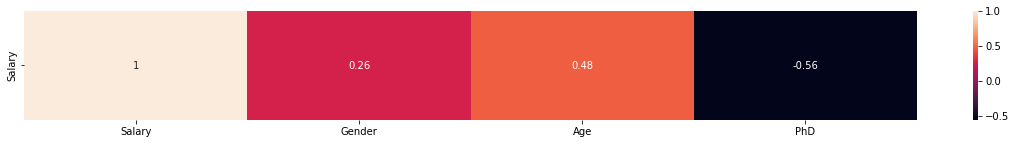

In [53]:
z= df.corr().head(1)
plt.figure(figsize=(20,2))
sns.heatmap(z,annot= True)

### Nomulticolinerity

<AxesSubplot:>

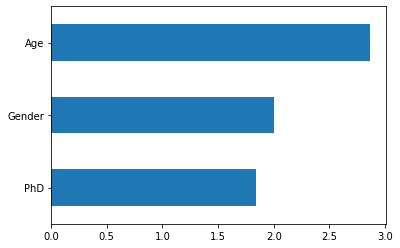

In [54]:
x= df.drop('Salary',axis=1)
vif_list=[]
for i in range(x.shape[1]):
    vif= variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1= pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind='barh')

## Train Test Split

In [55]:
x= df.drop('Salary',axis=1)
y=df['Salary']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=8)

## Model Training

In [57]:
lin_reg_model =LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [58]:
#training the model
y_pred_train = lin_reg_model.predict(x_train)
    
mse = mean_squared_error(y_train, y_pred_train)
print('mse:',mse)

rmse =np.sqrt(mse)
print('rmse:',rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('mae:',mae)

r2_score = r2_score(y_train, y_pred_train)
print('r2_score:',r2_score)

mse: 10714071.238903463
rmse: 3273.2355917201353
mae: 2378.308183574595
r2_score: 0.40267877757571824


In [60]:
from sklearn.metrics import r2_score
#testing the model
y_pred_test = lin_reg_model.predict(x_test)
    
mse = mean_squared_error(y_test, y_pred_test)
print('mse:',mse)

rmse =np.sqrt(mse)
print('rmse:',rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print('mae:',mae)

r2_score = r2_score(y_test,y_pred_test)
print('r2_score:',r2_score)

mse: 9379483.883052973
rmse: 3062.5943059852007
mae: 2356.417159360948
r2_score: 0.4055240835043319


## Normality residual

In [61]:
residual = y_train - y_pred_train
residual

57     214.918199
64   -1657.236936
80    3209.442437
24    -749.636515
70    -637.903328
         ...     
8     5006.411272
90   -1301.028860
5     1300.363485
84     579.536803
67     992.958800
Name: Salary, Length: 80, dtype: float64

## Kde Plot

<AxesSubplot:xlabel='Salary', ylabel='Density'>

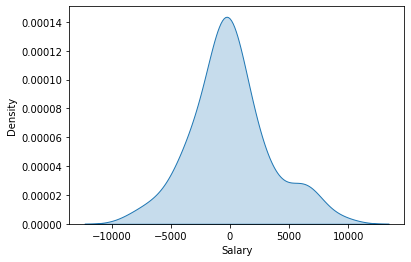

In [63]:
sns.kdeplot(residual,fill=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

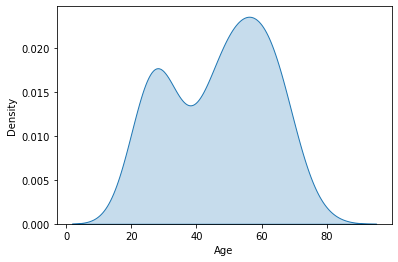

In [66]:
sns.kdeplot(df['Age'],fill=True)

## One line testing

In [75]:
df.columns

Index(['Salary', 'Gender', 'Age', 'PhD'], dtype='object')

In [76]:
df.head(1).T

,0
Salary,14000
Gender,1
Age,47
PhD,0


In [99]:

Gender ='male'
Age = 30
PhD = 'yes'

In [100]:
lable_encoded_columns ={'Gender':{'male': 1, 'female': 0},'PhD':{'no': 1, 'yes': 0}}

In [101]:
test_array =np.zeros(x.shape[1])
test_array[0]= lable_encoded_columns['Gender'][Gender]
test_array[1]=Age
test_array[2]=lable_encoded_columns['PhD'][PhD]
test_array

array([ 1., 30.,  0.])

In [102]:
lin_reg_model.predict([test_array])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6089.73088178])

In [103]:
import pickle
with open('Salarypkl.pkl','wb') as a:
    pickle.dump(lin_reg_model,a)


In [106]:
import json

with open('lable_encoded_json.json','w') as a:
    json.dump(lable_encoded_columns, a)